In [0]:
import sqlite3
import pandas as pd
from nltk.tokenize import word_tokenize
from sqlalchemy import create_engine # database connection
import os
import datetime as dt
from datetime import datetime

In [0]:
#Creating db file from csv
#Learn SQL: https://www.w3schools.com/sql/default.asp
if not os.path.isfile('trainy.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///trainy.db')
    start = dt.datetime.now()
    chunksize = 10000
    j = 0
    index_start = 1
    for df in pd.read_csv('no_dup_train.csv', names=['Id', 'Title', 'Body', 'Tags'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('no_dup_train', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", datetime.now() - start)

In [0]:
#Learn SQl: https://www.w3schools.com/sql/default.asp
if os.path.isfile('trainy.db'):
    start = datetime.now()
    con = sqlite3.connect('trainy.db')
    data = pd.read_sql_query('SELECT * FROM no_dup_train LIMIT 50000', con)
    con.close()#SELECT * FROM `your_table` LIMIT 1001, 5000 
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the first to genarate train.db file")

Time taken to run this cell : 0:00:02.445675


In [0]:
#very important thing to learn here is that for list we should not use 
#list.len(). we should use len(list)
#iam just specifying number of tags occuring in each question
data['tagcount']=data['Tags'].apply(lambda text: len(text.split()))

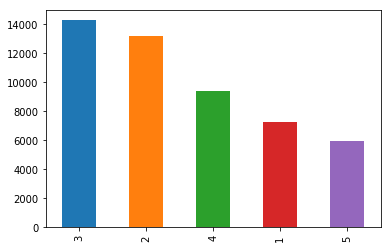

In [0]:
#if u want to draw bar graph for the tags youn can specify
#value_counts().plot(kind='bar')
%matplotlib inline
import matplotlib.pyplot as plt
data['tagcount'].value_counts().plot(kind='bar')

In [0]:
data=data.drop_duplicates(subset={'Title','Tags','tagcount'},keep='first')

In [0]:
#we have already seen one important thing in countvectorizer 
#that is get_feature_names()
from sklearn.feature_extraction.text import CountVectorizer
#In this only i got to know giving tokenizer is much important
vect=CountVectorizer(tokenizer=lambda x: x.split())
tagdatamatrix=vect.fit_transform(data['Tags'])

In [0]:
#this will tell me no. of datapoints
print(tagdatamatrix.shape[0])
#to know number of unique tags
print(tagdatamatrix.shape[1])
#to know what are the tags present
tagy=vect.get_feature_names()
tagy[:10]
#see tsgy is a type of listso we cant give tagy.head()
#we can mention like this that the number of elements i require
#but like data[:10] we can give for dataframe

49725
12504


['.aspxauth',
 '.bash-profile',
 '.class-file',
 '.doc',
 '.each',
 '.emf',
 '.exe',
 '.htaccess',
 '.htpasswd',
 '.ico']

In [0]:
#now i want to know each tag occuring number of times
freqs=tagdatamatrix.sum(axis=0).A1
res=dict(zip(tagy,freqs))


In [0]:
# this is the important invention i have a set i want it to 
#convert it into dataframe so i first convert it into
#list wit setname.items() and i use pd.DataFrame specifying
#column names
s=pd.DataFrame(list(res.items()),columns=['tags','counts'])

In [0]:
s.head()

,tags,counts
0,.aspxauth,1
1,.bash-profile,4
2,.class-file,1
3,.doc,3
4,.each,16


In [0]:
#now we wnt dataframe to be sorted so i can use sort.values() function
ssorted=s.sort_values(['counts'],ascending=False)

In [0]:
ssorted.head()

,tags,counts
12,.net,5094
1413,c#,4615
8159,php,2817
5695,jquery,2540
5533,java,2498


In [0]:
#now i take an array i take values of ssorted counts
scounts=ssorted['counts'].values

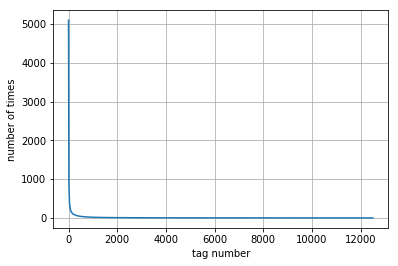

In [0]:
#now i plot a grid plot since it is continous values
plt.plot(scounts)
plt.grid()
plt.xlabel("tag number")
plt.ylabel("number of times")
plt.show()

In [0]:
data.head()

,index,Title,Body,Tags,tagcount
0,0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,2
1,1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,3
2,2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,4
3,3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,2
4,4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2


In [0]:
data['Body'].head()

0    <pre><code>#include&lt;iostream&gt;\n#include&...
1    <p>I should do binding for datagrid dynamicall...
2    <p>I should do binding for datagrid dynamicall...
3    <p>I followed the guide in <a href="http://sta...
4    <p>I use the following code</p>\n\n<pre><code>...
Name: Body, dtype: object

In [0]:
a=str(data['Body'][:1])
print(a)
data['Body'][2]

0    <pre><code>#include&lt;iostream&gt;\n#include&...
Name: Body, dtype: object


"<p>I should do binding for datagrid dynamically at code. I wrote the code as below. When I debug this code block, it seems that it does bindings correctly, but grid comes with no columns on form.</p>\n\n<pre><code>MyClass myInstance = new MyClass();\ndataGridObject = new DataGrid();\ndataGridObject.Width = 200;\ndataGridObject.Height = 200;\nbinding = new Binding();\nbinding.Source = myInstance;\nforeach (PropertyInfo prop in myInstance.GetType().GetProperties())\n{\n    binding.Path = new PropertyPath(prop.Name);\n    DataGridTextColumn column = new DataGridTextColumn();\n    column.Header = prop.Name;\n    column.Binding = new Binding(prop.Name);\n    dataGridObject.Columns.Add(column);\n}\n\ndataGridObject.ItemSource = myInstanceList;\n</code></pre>\n\n<p>Why doesn't come grid with columns, although I did necessary bindings?\nThanks for the replies in advance..</p>\n"

In [0]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words=set(stopwords.words('english'))
stemmer=SnowballStemmer("english")

In [0]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Processed.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [0]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table
start = datetime.now()
read_db = 'trainy.db'
#vv.v.vimportant thing i am giving 'Processed.db'as my write_db
write_db = 'Processed.db'
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 10000;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
print("Time taken to run this cell :", datetime.now() - start)

Tables in the databse:
QuestionsProcessed
Cleared All the rows
Time taken to run this cell : 0:03:08.861233


In [0]:
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
#fetchone() is used to fetch the records
# it fetches int the form of rows
#<code> if u see it presents in all all the title and body
#i want to remove <code from this title and body
# i have assigned rows of header to columns
#ro[0] to title,row[1] to questionwhich is body,row[2] to tags
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:
    is_code = 0
    title, question, tags = row[0], row[1], row[2]
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
# iam storing adding the lengths before preprocessing so that i can find average at last
#i want to substitute the code using re.DOTALL
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
# i will substitute this <code>woth question  with flags=re.MULTILINE|re.DOTALL
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))
#at same time iam making preprocessing of title and question which is body
    title=title.encode('utf-8')
# this is the important step whereiam mixing question and title to make a question
    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
#there there is two types of tokenize one is word_tokenize
#another one is sent_tokenize
#word_tokenize will tokenize based on the tokenize based on the number of words
#sent_tokenize will tokenize sentences based on sentences based on fullstop
#word_tokenize works based on space
    words=word_tokenize(str(question))
#there is reason we have not tokenized till now is till now we had htmlletters
#Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    #now i am putting all my sentences in writer
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

Avg. length of questions(Title+Body) before processing: 1172
Avg. length of questions(Title+Body) after processing: 341
Percent of questions containing code: 57
Time taken to run this cell : 0:00:21.844657


In [0]:
# dont forget to close the connections, or else you will end up with locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [0]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('is possibl programmat generat touchpad gestur event work os project want programmat generat touchpad gestur event like nseventtypeswip nseventtyperot nso rotat zoom etc applic found generat mous keyboard event touchpad ani idea',)
----------------------------------------------------------------------------------------------------
('calcul total multipl entri field databas look like how would use php find total hour individu employe work for exampl employe would work total hour employe work total hour',)
----------------------------------------------------------------------------------------------------
('innodb index merg tabl like row tabl mani combin descriptor id molecul id ts random doubl valu billion row impress queri like mysql would use key intersect result but queri tell use index chosen index index molecul id hit tabl ndescriptor id hit either small part tabl tabl like depend it seem like intersect would faster use index scan rest million row eve

In [0]:
#finally iam taking now the data into database 
#after this i train my machine learning models
#Taking 0.5 Million entries to a dataframe.
write_db = 'Processed.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
        
conn_r.commit()
conn_r.close()

In [0]:
preprocessed_data.head()

,question,tags
0,help urlbst packag for reason fail use urlbst ...,urls
1,is possibl programmat generat touchpad gestur ...,objective-c xcode osx cocoa touchpad
2,calcul total multipl entri field databas look ...,php sql
3,innodb index merg tabl like row tabl mani comb...,mysql index innodb
4,librari music audio analysi visual learn openg...,c++ audio music


In [0]:
#converting tags for multilabel problems
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer(tokenizer=lambda x: x.split())
multilabely=vec.fit_transform(preprocessed_data['tags'])

In [0]:
#due to low computation power
#we have to limit the number of tags we gonna choose
#we will use some criterrion to do this


In [0]:
def tagstochoose(n):
    t=multilabely.sum(axis=0).tolist()[0]
    #From this we will get the which tag is occuring more frequently
    #this is the criterrion we gonna consider
    #so we will take the important tags like this 
    sortedtags=sorted(range(len(t)),key=lambda i :t[i],reverse=True)
    multilabely1=multilabely[:,sortedtags[:n]]
    
    return multilabely1

In [0]:
def questionsexplained1(n):
    multilabelyn=tagstochoose(n)
    x=multilabelyn.sum(axis=1)
    return (np.count_nonzero(x==0))

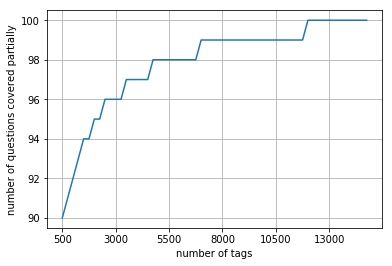

In [0]:
import numpy as np
questionsexplained=[]
totaltags=multilabely.shape[1]
totalquestions=preprocessed_data.shape[0]
for i in range(500,totaltags,100):
    questionsexplained.append(np.round(((totalquestions-questionsexplained1(i))/totalquestions)*100))
fig,ax=plt.subplots()
ax.plot(questionsexplained)
xlabel=list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel('number of tags')
plt.ylabel('number of questions covered partially')
plt.grid()
plt.show()

In [0]:
multilabelyx=tagstochoose(5500)
totalsize=preprocessed_data.shape[0]
trainsize=int(0.8*totalsize)
xtrain=preprocessed_data.head(trainsize)
xtest=preprocessed_data.tail(totalsize-trainsize)
ytrain=multilabelyx[0:trainsize]
ytest=multilabelyx[trainsize:totalsize,:]

In [0]:
print(ytrain.shape)
print(xtrain.shape)
print(xtest.shape)
print(ytest.shape)

(7999, 5500)
(7999, 2)
(2000, 2)
(2000, 5500)


In [0]:
print(xtrain[:2])

                                            question  \
0  help urlbst packag for reason fail use urlbst ...   
1  is possibl programmat generat touchpad gestur ...   

                                   tags  
0                                  urls  
1  objective-c xcode osx cocoa touchpad  


In [0]:
print(xtrain.iloc[0,:])

question    help urlbst packag for reason fail use urlbst ...
tags                                                     urls
Name: 0, dtype: object


In [0]:
print(ytrain[:2])

  (0, 2606)	1
  (1, 14)	1
  (1, 35)	1
  (1, 30)	1
  (1, 71)	1


In [0]:
print(xtest[:2])

                                               question  \
7999  how queri gql use entiti key how write queri e...   
8000  how access url get respons java servlet new se...   

                                     tags  
7999  google-app-engine gae-datastore gql  
8000                        java servlets  


actually it is multi class label we are predicting the tags
so we have to use multi class classification algortihm
we can implement multiclass using the logistic regression and svm using the normal sgd classfier 
we normally use one vs rest classifier along with sgd classifier
how we use the use the sgd classifier is we change the losses generally we know that 
log loss is for logistic regressiion
hinge loss for svm
square loss for regression
generally when we are using the cross validation with calibratedclassifier cv we se this
along eith sgd classifier
when we are applying regression using logistic and svm we use the same method

we can use onevsrest classifier for multi class and multilabel also

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vecty=TfidfVectorizer(min_df=0.00009,tokenizer= lambda x:x.split())
xtrainmultilabel=vecty.fit_transform(xtrain['question'])
xtestmultilabel=vecty.fit_transform(xtest['question'])


In [0]:
print(xtrainmultilabel.shape)

(7999, 18159)


In [0]:
print(xtestmultilabel.shape)

(2000, 7901)


this is the methiodn we gonna use for multiclass classification using knn
actually due to memory constraints we are not writing this in code other\
wise it is powerful to use\
from sklearn.multilearn.adapt import MLKNN
classifier=MLKNN(k=21)
classifier.fit(xtrainmultilabel,ytrain)
prdictions=classifier.predict(xtestmultilabel)
print(accuracy_score(ytest,predictions)
# actually there are two types of f1score
print(metrics.f1score(ytest,predictions,average='micro')
print(metrics.f1score(ytest,predictions,averge='macro')
print(metrics.hamming_loss(ytest,predictions))



this is the method we gonna use for multiclass
uisng the logistic regression


classifierlogistic=OneVsRestCalssifier(SGDClassifier(loss='log',alpha=0.00001,penalty='l1'),n_jobs=-1)
classifierlogistic.fit(xtrainmultilabel,ytrain)
predictions=classifierlogistic.predict(xtestmultilabel)
print("accuracy",accuracy_score(ytest,predictions)
print("f1score",metrics.f1_score(ytest,predictions,average='micro')
print('macro f1_score',metrics.f1_score(ytest,predictions,average='macro')
print(hamming_loss(ytest,predictions)
print('precision reccall report',metrics.classification_report(ytest,predictions))\
# actually this one vs rest classifier used for 
both multi class and multi label

In [0]:
sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Titlemoreweight.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [0]:
preprocessed_data.shape

(9999, 2)

In [0]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 9999
number of dimensions : 2


In [0]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

In [0]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
     questions_explained.append(np.round(((totalquestions-questionsexplained1(i))/totalquestions)*100))

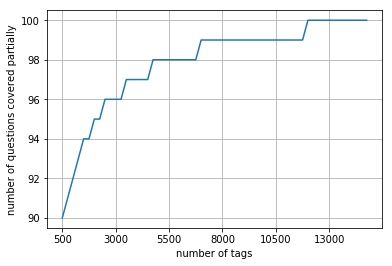

In [0]:
fig,ax=plt.subplots()
ax.plot(questions_explained)
xlabel=list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel('number of tags')
plt.ylabel('number of questions covered partially')
plt.grid()
plt.show()

In [0]:
multilabel_yx = tagstochoose(500)
#print("number of questions that are not covered :", questionsexplained(500),"out of ", total_qs)

In [0]:
preprocessed_data.shape

(9999, 2)

In [0]:
vectory=TfidfVectorizer(tokenizer=lambda x:x.split())
xtrainymultilabel=vectory.fit_transform(preprocessed_data['question'])



In [0]:
print(xtrainymultilabel.shape)

(9999, 20807)


In [0]:
print(multilabel_yx.shape)

(9999, 500)


In [0]:
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(xtrainymultilabel,multilabel_yx,test_size=0.3)

In [0]:
print(xtrain1.shape)
print(xtest1.shape)
print(ytrain1.shape)
print(ytest1.shape)

(6999, 20807)
(3000, 20807)
(6999, 500)
(3000, 500)


In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [0]:

classifiery=OneVsRestClassifier(SGDClassifier(loss='log',alpha=0.00001,penalty='l1'),n_jobs=-1)
classifiery.fit(xtrain1,ytrain1)
predictions2=classifiery.predict(xtest1)
print('accuray',accuracy_score(predictions2,ytest1))
print('f1score',metrics.f1_score(predictions2,ytest1,average='micro'))
print('hamming loss',metrics.hamming_loss(predictions2,ytest1))

accuray 0.181
f1score 0.36919858805072553
hamming loss 0.0032166666666666667


In [0]:
print('accuray',accuracy_score(predictions2,ytest1)*100)
print('f1score',metrics.f1_score(predictions2,ytest1,average='micro'))
print('hamming loss',metrics.hamming_loss(predictions2,ytest1))

accuray 18.099999999999998
f1score 0.36919858805072553
hamming loss 0.0032166666666666667


In [0]:
from sklearn.linear_model import LogisticRegression
classifierfinal=OneVsRestClassifier(LogisticRegression(penalty='l1'),n_jobs=-1)
classifierfinal.fit(xtrain1,ytrain1)
predicttionsfinal=classifierfinal.predict(xtest1)
print('accuracy',accuracy_score(predicttionsfinal,ytest1))
print('f1score',metrics.f1_score(predicttionsfinal,ytest1,average='micro'))
print('macrof1score',metrics.f1_score(predicttionsfinal,ytest1,average='macro'))
print('hammingloss',metrics.hamming_loss(predicttionsfinal,ytest1))

accuracy 0.17966666666666667
f1score 0.3205693950177936
macrof1score 0.15392951180967726
hammingloss 0.003182


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# 1.bag of words upto 4 grams 
#due to computation limitation iam limiting to bigrams
#computing the f1 score

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectory=CountVectorizer(min_df=2,ngram_range=(1,2))
xtrainymultilabel=vectory.fit_transform(preprocessed_data['question'])
xtrain1,xtest1,ytrain1,ytest1=train_test_split(xtrainymultilabel,multilabel_yx,test_size=0.3)


In [0]:
print(xtrain1.shape)
print(xtest1.shape)
print(ytrain1.shape)
print(ytest1.shape)

(6999, 71550)
(3000, 71550)
(6999, 500)
(3000, 500)


In [0]:
from sklearn.linear_model import LogisticRegression
classifierfinal=OneVsRestClassifier(LogisticRegression(penalty='l1'))



In [0]:
classifierfinal.fit(xtrain1,ytrain1)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [0]:
predicttionsfinal=classifierfinal.predict(xtest1)

In [0]:
import warnings
warnings.filterwarnings('ignore')
print('accuracy',accuracy_score(predicttionsfinal,ytest1))
print('f1score',metrics.f1_score(predicttionsfinal,ytest1,average='micro'))
print('macrof1score',metrics.f1_score(predicttionsfinal,ytest1,average='macro'))
print('hammingloss',metrics.hamming_loss(predicttionsfinal,ytest1))

accuracy 0.165
f1score 0.39565659993213437
macrof1score 0.2700809146719943
hammingloss 0.003562


In [0]:
#2.performing hyperparameter tunung for logistic regression to improve performance

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
alpha=[10**-2,10**-1,1,10**1,10**2]
accuracy=[]
f1scores=[]
macrof1scores=[]
hammingloss=[]
for i in alpha:
    classifierfinal=OneVsRestClassifier(LogisticRegression(penalty='l1',C=i))
    classifierfinal.fit(xtrain1,ytrain1)
    predicttionsfinal=classifierfinal.predict(xtest1)
    accuracy.append(accuracy_score(predicttionsfinal,ytest1))
    f1scores.append(metrics.f1_score(predicttionsfinal,ytest1,average='micro'))
    macrof1scores.append(metrics.f1_score(predicttionsfinal,ytest1,average='macro'))
    hammingloss.append(metrics.hamming_loss(predicttionsfinal,ytest1))
print(accuracy)
print(f1scores)
print(macrof1scores)
print(hammingloss)

[0.103, 0.128, 0.17966666666666667, 0.17166666666666666, 0.174]
[0.0, 0.11863247863247862, 0.3208084258468546, 0.3837108553038743, 0.39101014983083615]
[0.0, 0.009900287206098706, 0.1539638552440207, 0.22855648656751168, 0.23750356182155405]
[0.0036413333333333332, 0.0034373333333333335, 0.0031813333333333333, 0.0033193333333333334, 0.00336]


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
classifierfinal=OneVsRestClassifier(LogisticRegression(C=10**1,penalty='l1'))
classifierfinal.fit(xtrain1,ytrain1)
predicttionsfinal=classifierfinal.predict(xtest1)
print('accuracy',accuracy_score(predicttionsfinal,ytest1))
print('f1score',metrics.f1_score(predicttionsfinal,ytest1,average='micro'))
print('macrof1score',metrics.f1_score(predicttionsfinal,ytest1,average='macro'))
print('hammingloss',metrics.hamming_loss(predicttionsfinal,ytest1))

accuracy 0.171
f1score 0.3833580980683507
macrof1score 0.227288455025945
hammingloss 0.00332


In [0]:
#3.one vs rest classifier with sgd classifier with hinge loss

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDClassifier
classifierfinal=OneVsRestClassifier(SGDClassifier(loss='hinge'))
classifierfinal.fit(xtrain1,ytrain1)
predicttionsfinal=classifierfinal.predict(xtest1)
print('accuracy',accuracy_score(predicttionsfinal,ytest1))
print('f1score',metrics.f1_score(predicttionsfinal,ytest1,average='micro'))
print('macrof1score',metrics.f1_score(predicttionsfinal,ytest1,average='macro'))
print('hammingloss',metrics.hamming_loss(predicttionsfinal,ytest1))

accuracy 0.182
f1score 0.3044510385756677
macrof1score 0.11571108860943441
hammingloss 0.0031253333333333333


#conclusions:
***introduction***
* stackoverflow tag prediction is the business probelm with problem statement to predict
*the tags of the questions
*the type of classififcation we are performing is multilabel calssification
#we can employ our machine learning models which we use for our classification
* we are using onevsrest classifier with our machinbe learning algorithms
*we are using f1 score as our metric to be used


***preprocessing***
*then we started with the data preprocessing steps which involves
*removal of duplicates
*filling th null values
*but we did not remove any outliers because mainly there are not many features and leass number of numerical features
*but we cleaned our text of questions where we removed the unwanted threads.


***feature engineering***
*then we started with the feature engineering
*we analysed the number of tags 
*number off tags that are occuring frequntly
*number of data points and number of tags
*number of tags per question
*after viewing all this we have taken that are occuring more frequently.
based on the vocabulary

***machine learning models***
* we can using multiple techinques in bulidong a machine learning model such as 
.binary relevance
.classifier chains
.label powerset
* we have selected top  tags based on their presence in the tags top 500 are selected


* we are using tfidf model and bag of words model
due to computatition limitation we were not able to perform the multilabel knn
actually...
*the accuaracy we obtained in this models are less since it is a multi label classification
*we  have selected only top 500 tags not all


*we have performed algorithms like
1.logistic regression model with onevs restr on tfidf vectorizer
2.logisticregression model with sgd classifier of log loss
(difference between both is the logistic regression model uses gradient descent
where as sgde classifier uses stochastic radient descent for optimisation)

In [0]:
s=[[0.18,0.369,0.003],[0.179,0.32,0.003]]
s1=pd.DataFrame(s,columns=['accuracy','f1score','hammingloss'],index=['sgd classifier with log loss','logistic regression'])
s1

,accuracy,f1score,hammingloss
sgd classifier with log loss,0.180,0.369,0.003
logistic regression,0.179,0.320,0.003


# ***for assignments ***
1.for logistic regression
2.logistiv regression after hyper parameter training
3.sgd regressor with hinge loss for svm

In [0]:
s=[[0.165,0.395,0.27,0.0035],[0.171,0.383,0.227,0.0035],[0.182,0.30,0.11,0.003]]
s1=pd.DataFrame(s,columns=['accuracy','f1score','macrof1score','hammingloss'],index=['logistic regression','logistic regression after hyperparameter tuning','sgd regressor with hinge loss'])
s1

,accuracy,f1score,macrof1score,hammingloss
logistic regression,0.165,0.395,0.270,0.0035
logistic regression after hyperparameter tuning,0.171,0.383,0.227,0.0035
sgd regressor with hinge loss,0.182,0.300,0.110,0.0030
